In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


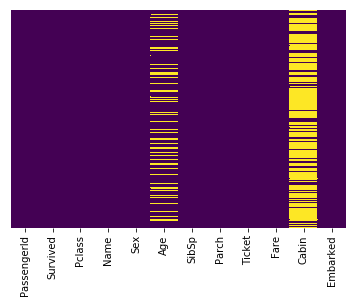

In [7]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [8]:
sns.set_style('whitegrid')

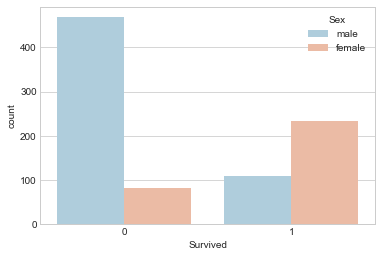

In [12]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

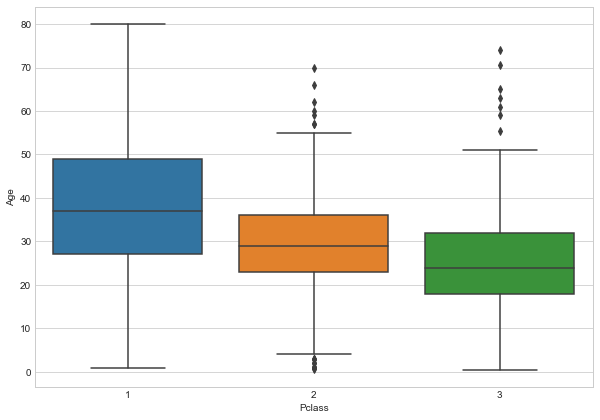

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37 
        elif Pclass == 9:
            return 24
        else:
            return 24
    else:
        return Age
    

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

In [32]:
train.drop('Cabin',axis = 1, inplace = True)

KeyError: "labels ['Cabin'] not contained in axis"

In [30]:
train.dropna(inplace = True)

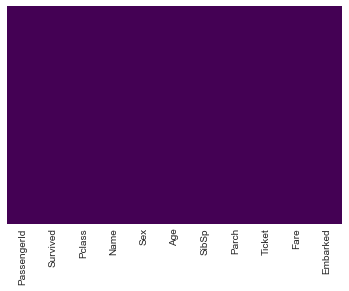

In [33]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [36]:
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [37]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [39]:
train = pd.concat([train,sex,embark], axis = 1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [49]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

KeyError: "labels ['Sex' 'Embarked' 'Name' 'Ticket'] not contained in axis"

In [47]:
train.drop('PassengerId',axis = 1, inplace = True)

In [50]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [51]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [52]:
from sklearn.cross_validation import train_test_split

C:\Users\mahes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()

In [56]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
predictions = logmodel.predict(X_test)